## Homework 3: Classification and Regularization


 This assignment is based on the classification concepts you have covered
in class. The implementation of these is handled by the tools provided by
Python. This assignment tests your concepts in terms of how you approach
classification problems.

This is an individual assignment. No collaboration is allowed, and if 
discovered, will be reported.

<b> Total: 150 marks </b>

## Question 1: Binary Classification (70 marks)

For this part of the assignment, you will be using the Autism dataset
provided to you. You have to classify whether an adult has autism or not
based on the data provided.

You will be using the dataset "autism.csv", which will be provided to you. Go through the README file for this dataset, which will give you a better idea about the data and its attributes.


In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

df = pd.read_csv("autism.csv")

# Take a quick look at the data

df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [2]:
# Here's another look at it

df.tail()


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO
703,704,1,0,1,1,1,0,1,1,1,...,f,White-European,no,no,Cyprus,no,8,18 and more,Self,YES


## Part 1a: Short questions (5 marks)

Q. What is the target variable? 
Class/ASD




Q. Out of the ones you have learnt, what kind of classification will you use? 
Binary Classification



## Part 1b: Preprocessing (5 marks)
By now, you should have an idea about what you are supposed to do.
Carry out any preprocessing or data cleaning you feel is necessary in this part. 
State why you carried out these steps (if any).


In [3]:
# Preprocess your data
# Changing the name of attribute Class/ASD to Class_ASD because of syntax problem

df=df.rename(columns = {'Class/ASD':'Class_ASD'})
#df.head()
#print (df["age"])
#df.describe(include='all')
#df.isna().sum()
df = df[df.age != "?"]
df = df.reset_index(drop=True)
print (df["age"])
df['age'] = pd.to_numeric(df['age'])
df.dtypes





0      26
1      24
2      27
3      35
4      40
5      36
6      17
7      64
8      29
9      17
10     33
11     18
12     17
13     17
14     17
15     18
16     31
17     30
18     35
19     34
20     38
21     27
22     27
23     42
24     43
25     24
26     40
27     40
28     48
29     31
       ..
672    27
673    24
674    35
675    18
676    43
677    44
678    40
679    49
680    24
681    30
682    53
683    38
684    28
685    28
686    26
687    39
688    31
689    24
690    28
691    31
692    27
693    28
694    31
695    46
696    27
697    25
698    34
699    24
700    35
701    26
Name: age, Length: 702, dtype: object


id                  int64
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class_ASD          object
dtype: object

In [4]:
x = df['age'].idxmax()
print(x)

52


In [5]:
#This could be a typing error and can be a 38. Converting 383 to 38
df.at[x, 'age'] = 38
print(df['age'].max())

64


In [6]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [7]:
print(df['ethnicity'].unique())
df = df[df.ethnicity != "?"]
df = df.reset_index(drop=True)
print(df['ethnicity'].unique())

['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


In [8]:
print(df['relation'].unique())
df = df[df.relation != "?"]
df = df.reset_index(drop=True)
print(df['relation'].unique())


['Self' 'Parent' 'Health care professional' 'Relative' 'Others']
['Self' 'Parent' 'Health care professional' 'Relative' 'Others']


In [9]:
df.loc[df['ethnicity']=='others']='Others'
print(df['ethnicity'].unique())
df['age'].unique()
df = df[df.age != "Others"]
df = df.reset_index(drop=True)
print(df['age'].unique())
df['age'] = pd.to_numeric(df['age'])
df.dtypes

['White-European' 'Latino' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish']
[26 24 27 35 36 17 64 29 33 18 31 30 42 40 48 37 55 50 34 53 20 28 21 38
 47 43 32 44 19 58 22 39 25 23 54 60 41 46 45 56 61 59 52 49 51]


id                 object
A1_Score           object
A2_Score           object
A3_Score           object
A4_Score           object
A5_Score           object
A6_Score           object
A7_Score           object
A8_Score           object
A9_Score           object
A10_Score          object
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result             object
age_desc           object
relation           object
Class_ASD          object
dtype: object

In [10]:
print(df['result'].unique())
# df = df[df.relation != "?"]
# df = df.reset_index(drop=True)
# print(df['relation'].unique())
df['result'] = pd.to_numeric(df['result'])
df.dtypes

[6 5 8 9 2 10 3 0 1 4 7]


id                 object
A1_Score           object
A2_Score           object
A3_Score           object
A4_Score           object
A5_Score           object
A6_Score           object
A7_Score           object
A8_Score           object
A9_Score           object
A10_Score          object
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class_ASD          object
dtype: object

## Part 1c: Visualization (5 marks)

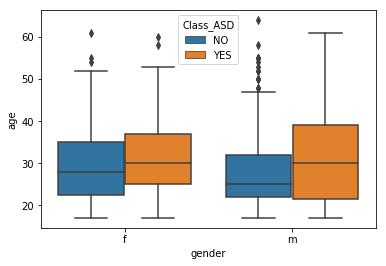

In [11]:
# Visualize the relationships between all the variables to get a glimpse
# of any potential correlations.
#Between gender and age and class
ax = sns.boxplot(x="gender", y="age", hue="Class_ASD", data=df)




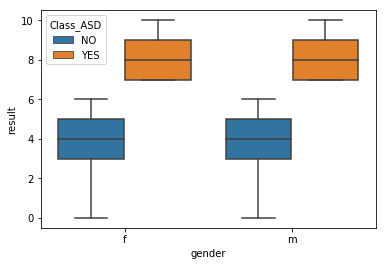

In [12]:
ax = sns.boxplot(x="gender", y="result", hue="Class_ASD", data=df)

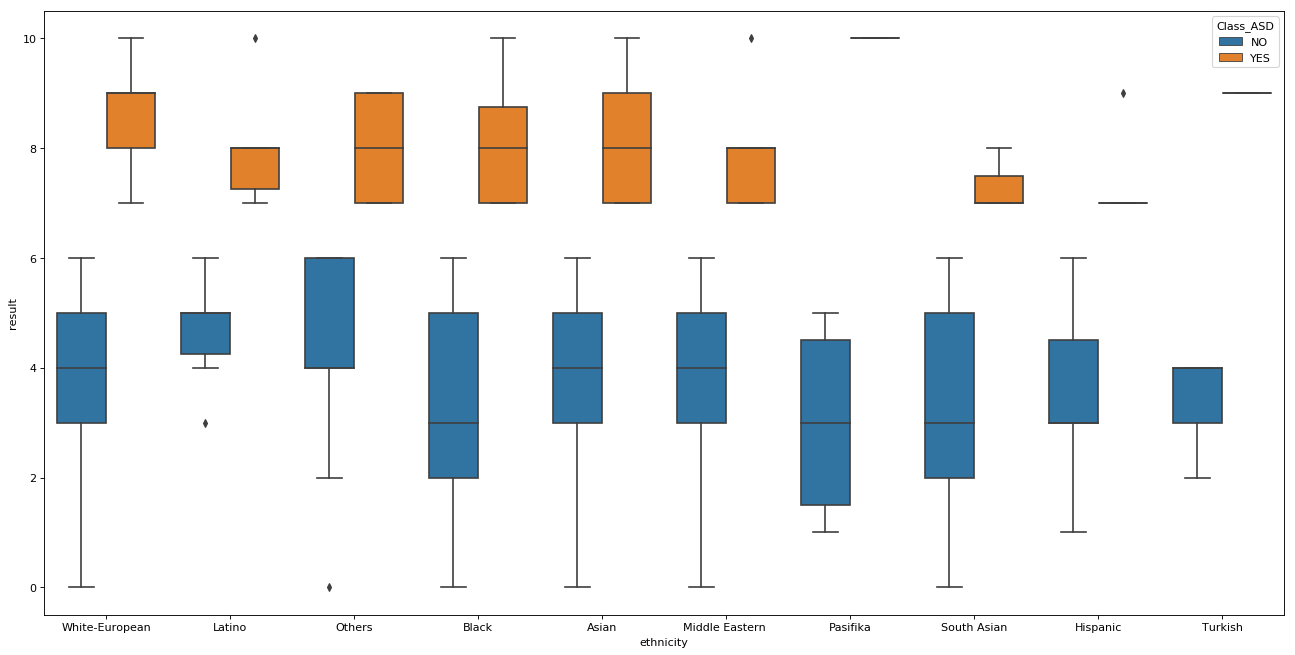

In [13]:
fig = plt.figure(figsize=(20,10), dpi=80)
ax = sns.boxplot(x="ethnicity", y="result", hue="Class_ASD", data=df)

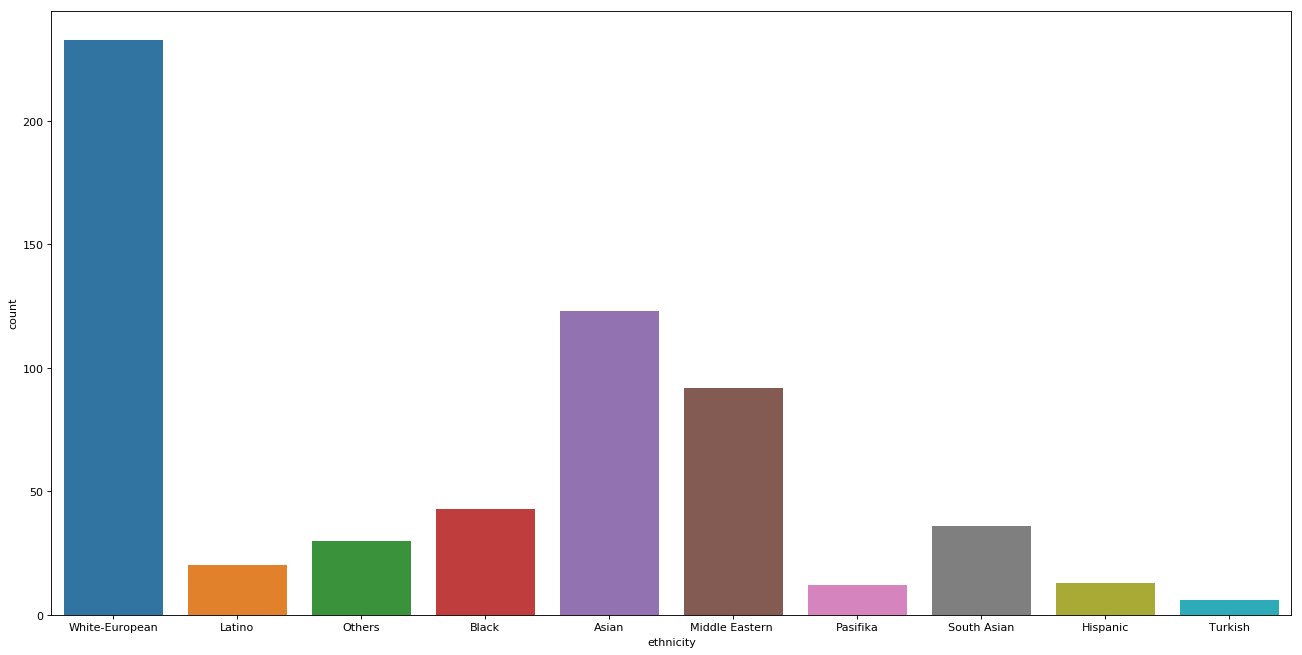

In [14]:
fig = plt.figure(figsize=(20,10), dpi=80)
ay = sns.countplot(x="ethnicity", data=df, capsize=.2)


## Part 2a: Data splitting (5 marks)

In [15]:
required = df['Class_ASD']
df.dtypes

id                 object
A1_Score           object
A2_Score           object
A3_Score           object
A4_Score           object
A5_Score           object
A6_Score           object
A7_Score           object
A8_Score           object
A9_Score           object
A10_Score          object
age                 int64
gender             object
ethnicity          object
jaundice           object
autism             object
country_of_res     object
used_app_before    object
result              int64
age_desc           object
relation           object
Class_ASD          object
dtype: object

In [16]:
tlabel = required.apply(lambda x: 1 if x == 'YES' else 0)
myfeatures = df[['age', 'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'result','relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score']]
features_to_encode = pd.DataFrame(data = myfeatures)
features_final = pd.get_dummies(features_to_encode)
encoded = list(features_final.columns)
print (encoded)

['age', 'result', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'jaundice_no', 'jaundice_yes', 'autism_no', 'autism_yes', 'country_of_res_Afghanistan', 'country_of_res_AmericanSamoa', 'country_of_res_Angola', 'country_of_res_Armenia', 'country_of_res_Aruba', 'country_of_res_Australia', 'country_of_res_Austria', 'country_of_res_Bahamas', 'country_of_res_Bangladesh', 'country_of_res_Belgium', 'country_of_res_Bolivia', 'country_of_res_Brazil', 'country_of_res_Burundi', 'country_of_res_Canada', 'country_of_res_Chile', 'country_of_res_China', 'country_of_res_Costa Rica', 'country_of_res_Cyprus', 'country_of_res_Czech Republic', 'country_of_res_Ecuador', 'country_of_res_Egypt', 'country_of_res_Ethiopia', 'country_of_res_Finland', 'country_of_res_France', 'country_of_res_Germany', 'country_of_

In [17]:
# Look through the different model selection methods sklearn has to offer.

## Split the data into training and testing. Mention what method you will
## be using and why. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(features_final, tlabel, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)




(486, 103)
(122, 103)


## Part 2b: Making the Model (10 marks)

In [18]:
## Start with making the model with your training data. For the model 
## training, testing and everything in between, we recommend using 
## scikitlearn.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, tlabel, cv=10)
print(cv_scores.mean())

predictions = (logreg.fit(X_train, y_train)).predict(X_test)

accuracy_score(y_test, predictions)








0.9966939890710382


1.0

## Part 2c: Testing the Model (15 marks)

For this part, you need to make a confusion matrix of the model's results and be able to interpret it. 

For information on confusion matrices and how to interpret them, refer to the following __[link](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)__. <br>
<br>


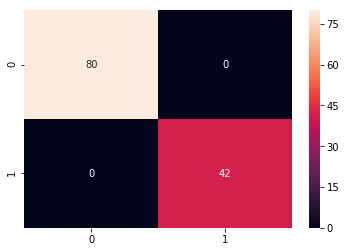

In [19]:
## Use a confusion matrix to test the accuracy of your model.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)


## Visualize your evaluation results. 
## Hint: Check Seaborn for something that could help you with this.
import seaborn as sn
sn.heatmap(confusion_matrix(y_test, predictions), annot=True)


In [20]:
# Part 2c (contd.) 
## Report the performance of your model. Show multiple metrics. 
cv_scores_roc = cross_val_score(logreg, features_final, tlabel, cv=10, scoring='roc_auc').mean()
print (cv_scores_roc.mean())

logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0


1.0

## Part 3: Regularization

Regularization is essential to reduce the amount of overfitting in your
model. For this part of the assignment, we will be using both the L1
and L2 regularization models.


## L1 Regularization/Lasso Regularization (10 marks)

Recall what you learnt in class about L1 regularization. It aims to 
reduce the model, by eliminating what it estimates to be the least
important features. Due to this, it is relatively unstable and robust.

You are required to use an in-built function to regularize the data
using L1 regularization. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.


training score: 0.0
test score:  -0.016113252190069982
number of features used:  0
training score for alpha=0.01: 0.6977072919743823
test score for alpha =0.01:  0.7045179013067637
number of features used: for alpha =0.01: 9
training score for alpha=0.0001: 0.7648600126528519
test score for alpha =0.0001:  0.6914685337967984
number of features used: for alpha =0.0001: 82
LR training score: 0.7658847511192363
LR test score:  -5.909135468684076e+17


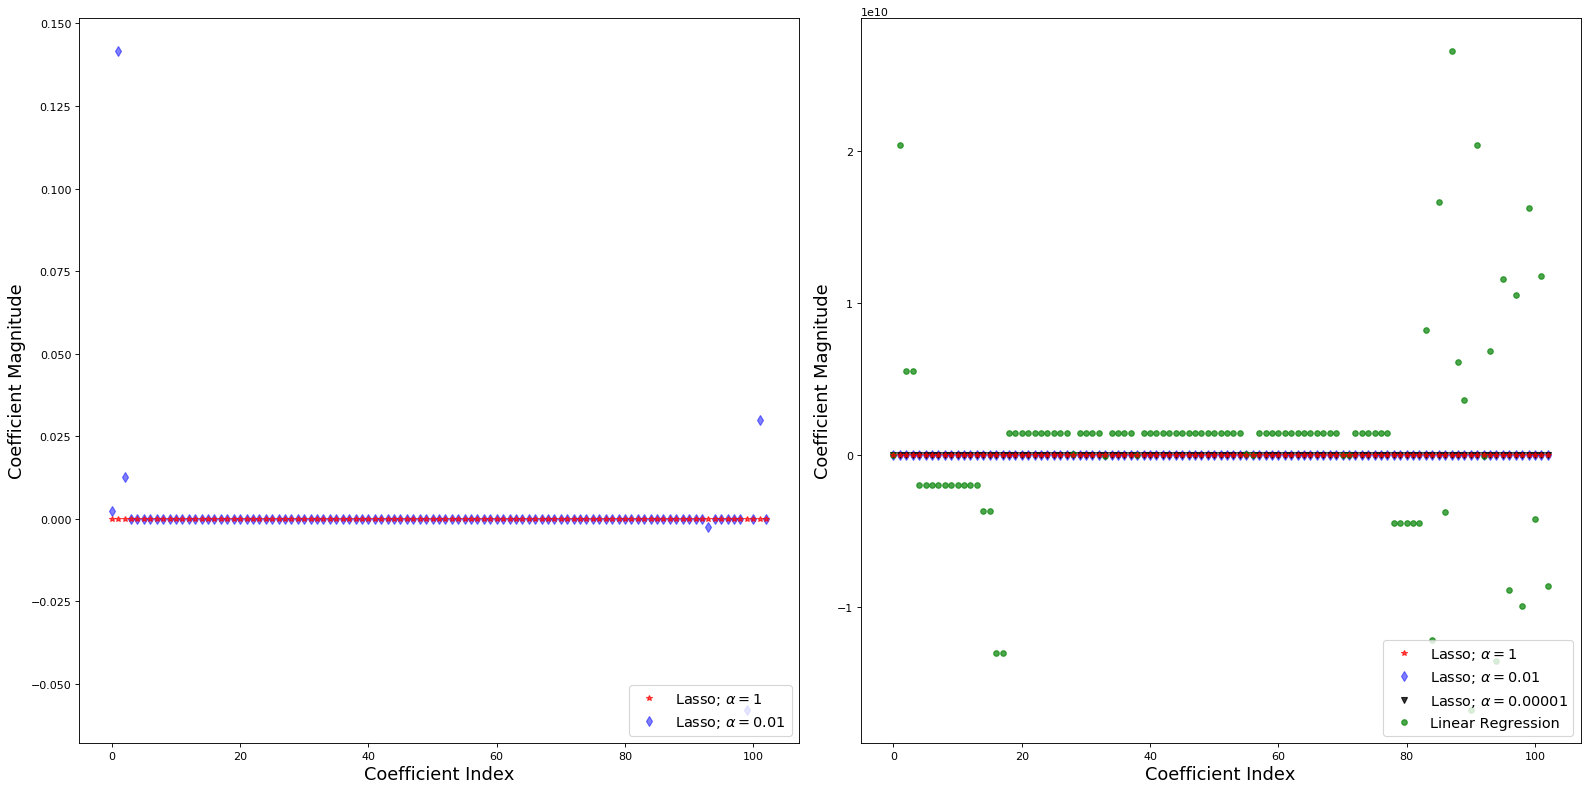

In [21]:
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import LinearRegression

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)


lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score) 
print ("LR test score: ", lr_test_score)


## Once this is done, report and visualize the performance of this model.
fig = plt.figure(figsize=(20,10), dpi=80)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()













## L2 Regularization/Ridge Regularization (10 marks)

To understand Ridge Regularization, we need to refer to what happens 
during gradient descent, during model coefficient training.
Our initial weights are updated according to a gradient update rule,
using a learning rate and a gradient. Ridge regression adds a penalty
to this update. Consequently, this shrinks the size of our weights.

L2 is more stable and less robust than L1. It also does not encourage
sparsity, as unlike L1, weights are never assigned to be 0. Hence, even 
the least important features are considered (albeit to a smaller degree).

For this part, you are required to follow the exact same steps as the
previous one. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.
<br>

linear regression train score: 0.7658847511192363
linear regression test score: -5.909135468684076e+17
ridge regression train score low alpha: 0.7658994824213106
ridge regression test score low alpha: 0.6770197676808112
ridge regression train score high alpha: 0.714850884664296
ridge regression test score high alpha: 0.719592628843587


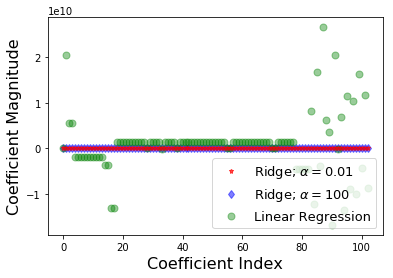

In [22]:
from sklearn.linear_model import Ridge 

lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

## Report and visualize the performance of this regularized model.

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()










## Questions (5 marks)

Q. Comment on the performance of the regularized models L1 and L2 compared 
to one another, as well as to the non-regularized model in Part 2. <br>
Lasso had the best performance for alpha 0.01 and so did ridge. The scores were lower than that of Non regularized


Q. What do you think are the causes of these results? <br>
Non regularized had the highest score, which could have been due to overfitting. Lasso filtered out the features and ridge reduced the complexity



*End of Question 1*

## Question 2: Multiclass Classification (80 marks)

This question is in the same vein as the last. You are provided with the 
Glass dataset. You have to infer the type of glass given its chemical
composition.

For this question, you are working with "Glass.csv" which has been attached alongside this assignment. Check out the README for this file to get a better understanding of its attributes.

In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Glass.csv")
af = pd.read_csv("Glass.csv")

df = df.drop(columns=['ID'])

# Have a quick look at the data.
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [24]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
type      int64
dtype: object

In [25]:
df['Fe'].max()

0.51

## Part 1a: Short questions (5 marks)
    
Q. Identify the target variable and its range of values. 
Type of glass : Type 1-7

Q. Of the classifiers discussed in class, which one will you use for this
dataset, and why?
One vs rest

Q. Does the data need any preprocessing? 
Data needs to be normalized 

## Part 1b: Visualization (5 marks)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

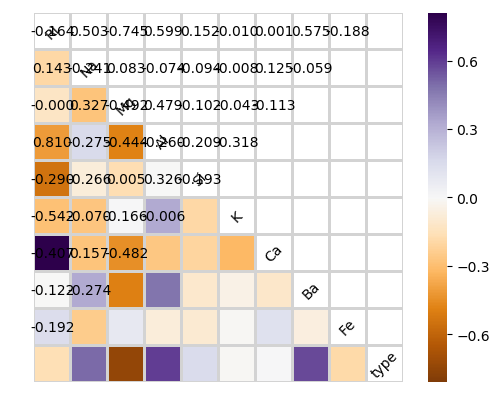

In [26]:
## Visualize all possible relationships between variables within the data.
import numpy as np; np.random.seed(1)
import pandas as pd
import seaborn.apionly as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)+(i-9.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(i+0.5,len(corr)-(j+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()


## Part 2a: Data splitting (5 marks)

In [27]:
required = df['type'] 
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
type      int64
dtype: object

In [28]:
## Split the data into train-test groups, using the method of your choice.
# Look through the different model selection methods sklearn has to offer.

myfeatures = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba','Fe']]

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(myfeatures, required, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)







(171, 9)
(43, 9)


## Part 2b: Making the Model (10 marks)

For this part you have two options for classifiers: Softmax Classifier 
or One-vs-Rest classification. Use one of these to model your data.

You are required to research this on your own. 

For guidance on Softmax, you can refer to __[this](https://towardsdatascience.com/the-softmax-function-neural-net-outputs-as-probabilities-and-ensemble-classifiers-9bd94d75932)__.

To learn more about One-vs-Rest classifier, check __[this](https://www.coursera.org/lecture/machine-learning/multiclass-classification-one-vs-all-68Pol)__ out. 


In [29]:
## Make your model
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

clf = LogisticRegression(random_state=0, multi_class='ovr')
model = clf.fit(X_train, y_train)

## Validate model with test data

predicted_values = model.predict(X_test)
p = model.predict_proba(X_test)
print(model.score(X_train,y_train))

0.631578947368421


## Part 2c: Testing the Model (15 marks)

In [30]:
## Show the accuracy of your model. Use the appropriate performance metrics.

print(fbeta_score(y_test, predicted_values, average='micro', beta=0.5))


print(fbeta_score(y_test, predicted_values, average='macro', beta=0.5))



0.627906976744186
0.5351713745701088


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Part 2d: Visualize the model's results (5 marks)

[[12  7  0  0  0  0]
 [ 0  9  0  2  1  0]
 [ 3  3  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]


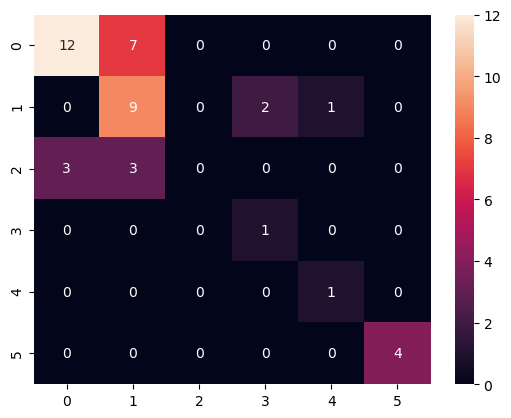

In [258]:
## Use a confusion matrix to test the accuracy of your model.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted_values))


## Visualize your evaluation results. 
## Hint: Check Seaborn for something that could help you with this.
import seaborn as sn
sn.heatmap(confusion_matrix(y_test, predicted_values), annot=True)

## Part 3: Regularization

As with the previous parts, you are required to regularize the multiclass 
model.

## L1 Regularization/Lasso Regularization (15 marks)

You are required to use an in-built function to regularize the data
using L1 regularization. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.

training score: 0.38266054579603986
test score:  0.26273292547827765
number of features used:  2
training score for alpha=0.01: 0.7469741784338604
test score for alpha =0.01:  0.6423887382776132
number of features used: for alpha =0.01: 8
training score for alpha=0.0001: 0.7478496069491163
test score for alpha =0.0001:  0.6445107795163559
number of features used: for alpha =0.0001: 9


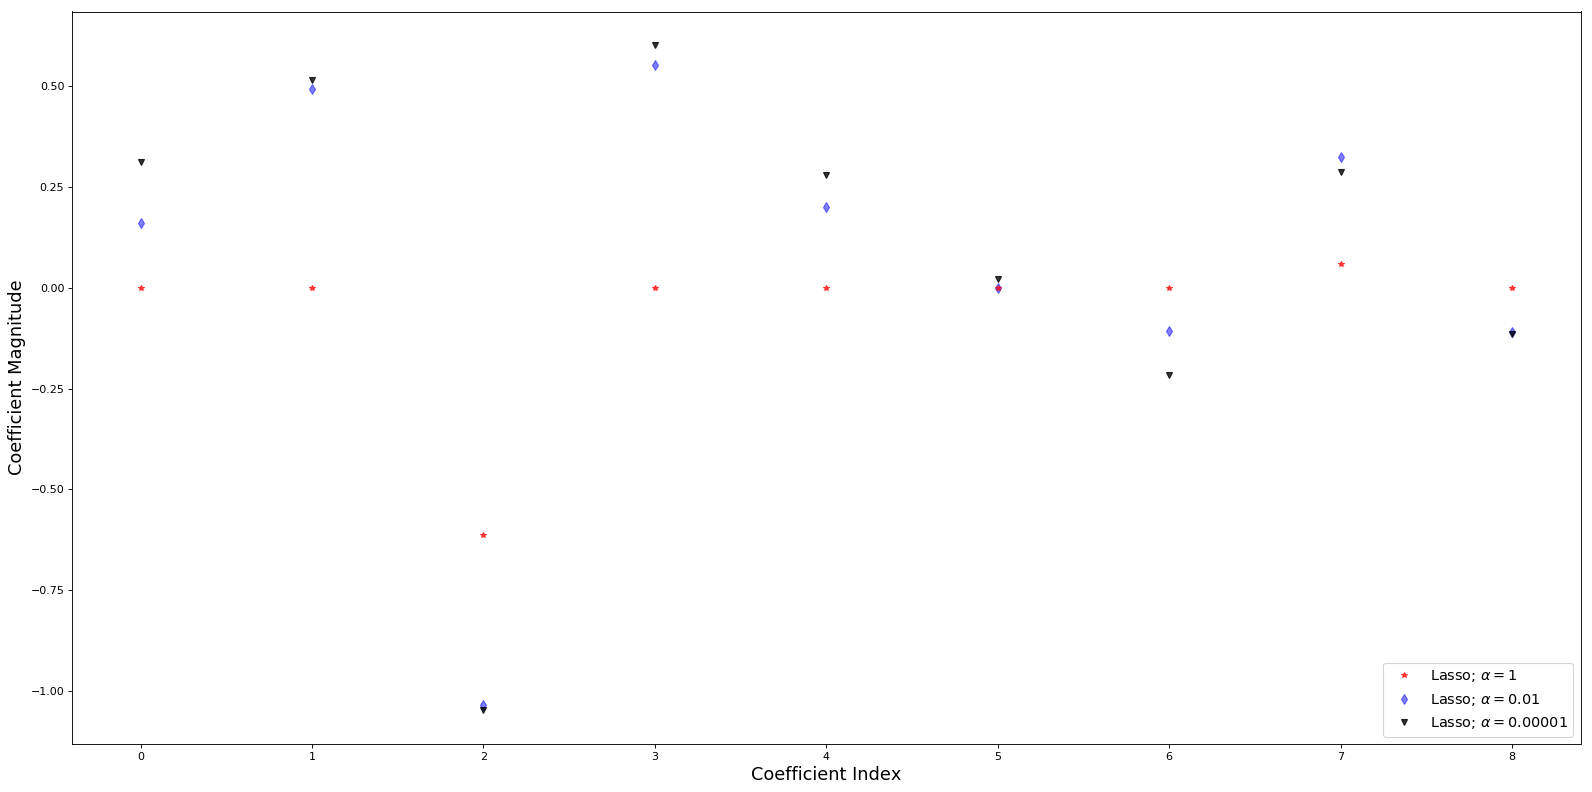

In [222]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

## Once this is done, report and visualize the performance of this model.
fig = plt.figure(figsize=(20,10), dpi=80)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency

plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

## L2 Regularization/Ridge Regularization (15 marks)

For this part, you are required to follow the exact same steps as the
previous one.

Be sure to play around with the parameters to get the model with the
best results. Show your process.


ridge regression train score low alpha: 0.7478497030517717
ridge regression test score low alpha: 0.6444964676458893
ridge regression train score high alpha: 0.7077136980603025
ridge regression test score high alpha: 0.6130902826391348


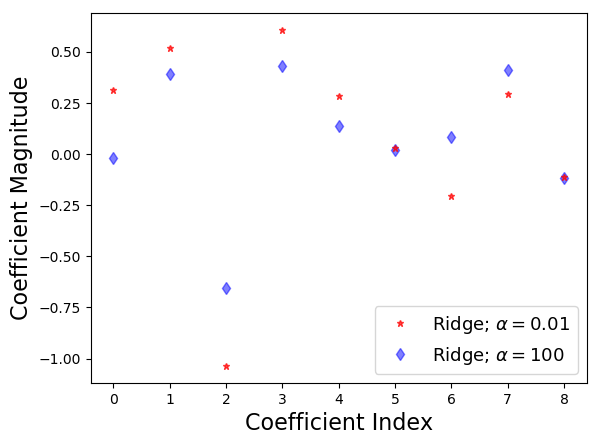

In [223]:
from sklearn.linear_model import Ridge 

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

## Report and visualize the performance of this regularized model.
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

## Questions (5 marks)

Q. Comment on the performance of the regularized models L1 and L2 compared 
to one another, as well as to the non-regularized model in Part 2. 
Changing alpha hardly had any effect on Lasso, in ricge alpha 100 gave a smaller spread. Non regularized as usual had the higest score.

Q.What do you think are the causes of these results? 
Feature selection didnt have an effect on the score, hence they all are equally important, ridge just reduced the complexity. Original high due to overfitting

Q. Comment on the results of regularization on the Autism dataset versus
the Glass dataset. Are the results similar? Are they different? What 
affects these results? 
Autism had alot of features hence lasso gave a better visualization, in Glass, ridge had a better visualiztion due to some features effecting a specific answer and so on.


*End of Question 2*